In [1]:
import sys
import os

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler

In [2]:
pd.pandas.set_option('display.max_columns',None)

In [3]:
pwd

'/home/yiw084/Documents/GitHub/ECE143_Group6'

In [4]:
# raw dataset or unprocessed dataset
data_path = './Data/original_data.csv'
dataset = pd.read_csv(data_path)
## print shape of dataset with rows and columns
print(dataset.shape)
# raw dataset 
dataset.head(10)

(53644, 26)


,userName,major,researchExp,industryExp,specialization,toeflScore,program,department,toeflEssay,internExp,greV,greQ,userProfileLink,journalPubs,greA,topperCgpa,termAndYear,confPubs,ugCollege,gmatA,cgpa,gmatQ,cgpaScale,gmatV,univName,admit
0,143saf,Systems and Control,0,18,Robotics,112.0,MS,Instrumentation & Control,26,5.0,160.0,167.0,http://www.edulix.com/unisearch/user.php?uid=2...,0,4.5,8.90,Fall - 2015,0,Dharamsinh Desai University,NaN,8.50,NaN,10,NaN,Worcester Polytechnic Institute,1
1,7790ashish,Manufacturing Engineering,0,0,NaN,NaN,MS,0,NaN,0.0,NaN,NaN,http://www.edulix.com/unisearch/user.php?uid=1...,0,NaN,0.00,Fall - 2013,0,NaN,NaN,0.00,NaN,0,NaN,Worcester Polytechnic Institute,1
2,AB25,(MIS / MSIM / MSIS / MSIT),0,66,NaN,94.0,MS,Computer Engineering,21,0.0,146.0,157.0,http://www.edulix.com/unisearch/user.php?uid=2...,0,3.0,81.00,Fall - 2015,0,IET DAVV,NaN,78.28,NaN,100,NaN,Worcester Polytechnic Institute,1
3,abhijitg,NaN,0,0,NaN,NaN,NaN,0,NaN,0.0,NaN,NaN,http://www.edulix.com/unisearch/user.php?uid=1...,NaN,NaN,0.00,NaN,NaN,NaN,NaN,0.00,NaN,0,NaN,Worcester Polytechnic Institute,1
4,abhijitgang,MIS,0,0,NaN,81.0,MS,computer,NaN,0.0,420.0,770.0,http://www.edulix.com/unisearch/user.php?uid=1...,0,2.5,70.00,Fall - 2011,0,Pune University,NaN,57.00,NaN,100,NaN,Worcester Polytechnic Institute,1
5,abhishek001,MIS,0,0,Information Security Management,273.0,MS,CE,6,0.0,410.0,1010.0,http://www.edulix.com/unisearch/user.php?uid=145,0,600.0,75.00,Fall - 2006,0,Thadomal Shahani Engineering College,NaN,52.00,NaN,100,NaN,Worcester Polytechnic Institute,1
6,agteakash,MIS,0,0,Business Analytics,104.0,MS,Computer Engineering,27,0.0,150.0,161.0,http://www.edulix.com/unisearch/user.php?uid=2...,0,4.5,77.81,Fall - 2015,0,University of Mumbai,NaN,62.20,NaN,100,NaN,Worcester Polytechnic Institute,1
7,alankarMIS,MIS-management related courses,0,0,NaN,95.0,MS,IT,22,0.0,147.0,156.0,http://www.edulix.com/unisearch/user.php?uid=1...,0,3.0,76.00,Fall - 2012,0,MU,NaN,52.00,NaN,100,NaN,Worcester Polytechnic Institute,1
8,amandeepsharma89,MIS,0,0,NaN,101.0,MS,I.T,24,0.0,490.0,740.0,http://www.edulix.com/unisearch/user.php?uid=6415,0,3.0,74.00,Fall - 2011,0,MU,NaN,64.00,NaN,100,NaN,Worcester Polytechnic Institute,1
9,amatelia3,Computer Science,0,0,NaN,107.0,MS,Information Technology,NaN,0.0,550.0,780.0,http://www.edulix.com/unisearch/user.php?uid=4175,0,4.5,0.00,Fall - 2011,0,K J Somaiya College of Engiineering,NaN,71.40,NaN,100,NaN,Worcester Polytechnic Institute,1


In [5]:
# GRE score conversion table
score_table = pd.read_csv('./Data/score.csv')
score_table.set_index(['old'],inplace=True)
score_table.head()

,newQ,newV
old,,
800,166,170
790,164,170
780,163,170
770,161,170
760,160,170


In [6]:
def greConversion(dataset, feature):
    '''
    covert old GRE socre ot new GRE scroe
    '''
    gre_score = list(dataset[feature])
    for i in range(len(gre_score)):
        if gre_score[i] > 170:
            try:
                if feature =='greV':
                    gre_score[i]=score_table['newV'][gre_score[i]]
                elif feature == 'greQ':
                    gre_score[i]=score_table['newQ'][gre_score[i]]
            except:
                continue
    
    return gre_score
    
    

In [7]:
dataset['greV']=greConversion(dataset, 'greV')
dataset['greQ']=greConversion(dataset, 'greQ')

In [8]:
# dataset afer greConversion 
dataset.head(10)

,userName,major,researchExp,industryExp,specialization,toeflScore,program,department,toeflEssay,internExp,greV,greQ,userProfileLink,journalPubs,greA,topperCgpa,termAndYear,confPubs,ugCollege,gmatA,cgpa,gmatQ,cgpaScale,gmatV,univName,admit
0,143saf,Systems and Control,0,18,Robotics,112.0,MS,Instrumentation & Control,26,5.0,160.0,167.0,http://www.edulix.com/unisearch/user.php?uid=2...,0,4.5,8.90,Fall - 2015,0,Dharamsinh Desai University,NaN,8.50,NaN,10,NaN,Worcester Polytechnic Institute,1
1,7790ashish,Manufacturing Engineering,0,0,NaN,NaN,MS,0,NaN,0.0,NaN,NaN,http://www.edulix.com/unisearch/user.php?uid=1...,0,NaN,0.00,Fall - 2013,0,NaN,NaN,0.00,NaN,0,NaN,Worcester Polytechnic Institute,1
2,AB25,(MIS / MSIM / MSIS / MSIT),0,66,NaN,94.0,MS,Computer Engineering,21,0.0,146.0,157.0,http://www.edulix.com/unisearch/user.php?uid=2...,0,3.0,81.00,Fall - 2015,0,IET DAVV,NaN,78.28,NaN,100,NaN,Worcester Polytechnic Institute,1
3,abhijitg,NaN,0,0,NaN,NaN,NaN,0,NaN,0.0,NaN,NaN,http://www.edulix.com/unisearch/user.php?uid=1...,NaN,NaN,0.00,NaN,NaN,NaN,NaN,0.00,NaN,0,NaN,Worcester Polytechnic Institute,1
4,abhijitgang,MIS,0,0,NaN,81.0,MS,computer,NaN,0.0,148.0,161.0,http://www.edulix.com/unisearch/user.php?uid=1...,0,2.5,70.00,Fall - 2011,0,Pune University,NaN,57.00,NaN,100,NaN,Worcester Polytechnic Institute,1
5,abhishek001,MIS,0,0,Information Security Management,273.0,MS,CE,6,0.0,147.0,1010.0,http://www.edulix.com/unisearch/user.php?uid=145,0,600.0,75.00,Fall - 2006,0,Thadomal Shahani Engineering College,NaN,52.00,NaN,100,NaN,Worcester Polytechnic Institute,1
6,agteakash,MIS,0,0,Business Analytics,104.0,MS,Computer Engineering,27,0.0,150.0,161.0,http://www.edulix.com/unisearch/user.php?uid=2...,0,4.5,77.81,Fall - 2015,0,University of Mumbai,NaN,62.20,NaN,100,NaN,Worcester Polytechnic Institute,1
7,alankarMIS,MIS-management related courses,0,0,NaN,95.0,MS,IT,22,0.0,147.0,156.0,http://www.edulix.com/unisearch/user.php?uid=1...,0,3.0,76.00,Fall - 2012,0,MU,NaN,52.00,NaN,100,NaN,Worcester Polytechnic Institute,1
8,amandeepsharma89,MIS,0,0,NaN,101.0,MS,I.T,24,0.0,152.0,158.0,http://www.edulix.com/unisearch/user.php?uid=6415,0,3.0,74.00,Fall - 2011,0,MU,NaN,64.00,NaN,100,NaN,Worcester Polytechnic Institute,1
9,amatelia3,Computer Science,0,0,NaN,107.0,MS,Information Technology,NaN,0.0,156.0,163.0,http://www.edulix.com/unisearch/user.php?uid=4175,0,4.5,0.00,Fall - 2011,0,K J Somaiya College of Engiineering,NaN,71.40,NaN,100,NaN,Worcester Polytechnic Institute,1


In [9]:
a = dataset[dataset['greV'] > 170]
b = dataset[dataset['greV'] > 170]

In [46]:
a.head(20)

,userName,major,researchExp,industryExp,specialization,toeflScore,program,department,toeflEssay,internExp,greV,greQ,userProfileLink,journalPubs,greA,topperCgpa,termAndYear,confPubs,ugCollege,gmatA,cgpa,gmatQ,cgpaScale,gmatV,univName,admit
308,viv2ban,Mechanical Engineering,0,0,automotive,NaN,MS,MECHANICAL,NaN,0.0,1741.0,169.0,http://www.edulix.com/unisearch/user.php?uid=1...,0,NaN,82.00,Fall - 2013,0,SHIRDI SAI ENGG COLLEGE,NaN,78.00,NaN,100,NaN,Wayne State University,1
6402,raghava0807,Electrical Engineering,0,0,NaN,94.0,MS,ece,NaN,0.0,5560.0,157.0,http://www.edulix.com/unisearch/user.php?uid=1...,0,2.5,82.00,Fall - 2012,0,srec,NaN,69.00,NaN,100,NaN,University of Texas Dallas,0
10147,tarneetsingh,Computer Engineering,0,0,Software Engineering,112.0,MS,CSE,NaN,0.0,565.0,163.0,http://www.edulix.com/unisearch/user.php?uid=1...,0,4.0,85.00,Fall - 2012,0,GGISPU,NaN,77.60,NaN,100,NaN,University of Southern California,1
19746,Fubumor,Civil Engineering,0,0,Construction Management,90.0,MS,Civil Engineering,NaN,0.0,374.0,726.0,http://www.edulix.com/unisearch/user.php?uid=1...,0,1100.0,0.00,Fall - 2012,0,MGM's College of Engineering and Technology,NaN,66.00,NaN,100,NaN,University of Florida,1
19926,lucevan13,Materials Science & Engineering,0,0,NaN,NaN,PhD,Materials Science,NaN,0.0,5103.0,164.0,http://www.edulix.com/unisearch/user.php?uid=1...,0,3.0,0.00,Spring - 2014,0,University of Florida,NaN,3.83,NaN,100,NaN,University of Florida,1
44094,jashwanthpeddi,Bioinformatics,0,0,Bioinformatics,89.0,MS,Bioinformatics,NaN,0.0,196.0,165.0,http://www.edulix.com/unisearch/user.php?uid=1...,0,2.5,9.00,Fall - 2013,0,SASTRA,NaN,7.90,NaN,10,NaN,New Jersey Institute of Technology,1
48199,tarneetsingh,Computer Engineering,0,0,Software Engineering,112.0,MS,CSE,NaN,0.0,565.0,163.0,http://www.edulix.com/unisearch/user.php?uid=1...,0,4.0,85.00,Fall - 2012,0,GGISPU,NaN,77.60,NaN,100,NaN,Columbia University,0
48466,pandeyanand,Computer Engineering,0,0,COMPUTER ENG,235.0,MS/PhD,ENGGINEERING,4.6,0.0,491.0,752.0,http://www.edulix.com/unisearch/user.php?uid=1...,0,3.0,8.50,Fall - 2012,0,BITS Pilani,NaN,7.00,NaN,10,NaN,Clemson University,1
49776,test01,Electrical Engineering,0,0,Control Systems,120.0,MS,IT,NaN,0.0,180.0,170.0,http://www.edulix.com/unisearch/user.php?uid=2...,0,4.2,9.62,Spring - 2016,0,R V College of Engineering,NaN,9.20,NaN,10,NaN,Carnegie Mellon University,1


In [44]:
len(a)

9

In [48]:
b.head(20)

,userName,major,researchExp,industryExp,specialization,toeflScore,program,department,toeflEssay,internExp,greV,greQ,userProfileLink,journalPubs,greA,topperCgpa,termAndYear,confPubs,ugCollege,gmatA,cgpa,gmatQ,cgpaScale,gmatV,univName,admit
308,viv2ban,Mechanical Engineering,0,0,automotive,NaN,MS,MECHANICAL,NaN,0.0,1741.0,169.0,http://www.edulix.com/unisearch/user.php?uid=1...,0,NaN,82.00,Fall - 2013,0,SHIRDI SAI ENGG COLLEGE,NaN,78.00,NaN,100,NaN,Wayne State University,1
6402,raghava0807,Electrical Engineering,0,0,NaN,94.0,MS,ece,NaN,0.0,5560.0,157.0,http://www.edulix.com/unisearch/user.php?uid=1...,0,2.5,82.00,Fall - 2012,0,srec,NaN,69.00,NaN,100,NaN,University of Texas Dallas,0
10147,tarneetsingh,Computer Engineering,0,0,Software Engineering,112.0,MS,CSE,NaN,0.0,565.0,163.0,http://www.edulix.com/unisearch/user.php?uid=1...,0,4.0,85.00,Fall - 2012,0,GGISPU,NaN,77.60,NaN,100,NaN,University of Southern California,1
19746,Fubumor,Civil Engineering,0,0,Construction Management,90.0,MS,Civil Engineering,NaN,0.0,374.0,726.0,http://www.edulix.com/unisearch/user.php?uid=1...,0,1100.0,0.00,Fall - 2012,0,MGM's College of Engineering and Technology,NaN,66.00,NaN,100,NaN,University of Florida,1
19926,lucevan13,Materials Science & Engineering,0,0,NaN,NaN,PhD,Materials Science,NaN,0.0,5103.0,164.0,http://www.edulix.com/unisearch/user.php?uid=1...,0,3.0,0.00,Spring - 2014,0,University of Florida,NaN,3.83,NaN,100,NaN,University of Florida,1
44094,jashwanthpeddi,Bioinformatics,0,0,Bioinformatics,89.0,MS,Bioinformatics,NaN,0.0,196.0,165.0,http://www.edulix.com/unisearch/user.php?uid=1...,0,2.5,9.00,Fall - 2013,0,SASTRA,NaN,7.90,NaN,10,NaN,New Jersey Institute of Technology,1
48199,tarneetsingh,Computer Engineering,0,0,Software Engineering,112.0,MS,CSE,NaN,0.0,565.0,163.0,http://www.edulix.com/unisearch/user.php?uid=1...,0,4.0,85.00,Fall - 2012,0,GGISPU,NaN,77.60,NaN,100,NaN,Columbia University,0
48466,pandeyanand,Computer Engineering,0,0,COMPUTER ENG,235.0,MS/PhD,ENGGINEERING,4.6,0.0,491.0,752.0,http://www.edulix.com/unisearch/user.php?uid=1...,0,3.0,8.50,Fall - 2012,0,BITS Pilani,NaN,7.00,NaN,10,NaN,Clemson University,1
49776,test01,Electrical Engineering,0,0,Control Systems,120.0,MS,IT,NaN,0.0,180.0,170.0,http://www.edulix.com/unisearch/user.php?uid=2...,0,4.2,9.62,Spring - 2016,0,R V College of Engineering,NaN,9.20,NaN,10,NaN,Carnegie Mellon University,1


In [49]:
len(b)

9

In [51]:
# Filter out candidates with greV or greQ > 170
dataset = dataset[dataset['greV'] <= 170]
dataset = dataset[dataset['greV'] <= 170]

In [52]:
""" 
#sanity check
a = dataset[dataset['greV'] > 170]
b = dataset[dataset['greV'] > 170]
print (len(a))
print (len(b))
"""

0
0


In [ ]:
# TODO: convert cgpa wrt cgoaScale

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53644 entries, 0 to 53643
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   userName         53644 non-null  object 
 1   major            53257 non-null  object 
 2   researchExp      53644 non-null  int64  
 3   industryExp      53644 non-null  int64  
 4   specialization   31949 non-null  object 
 5   toeflScore       49230 non-null  float64
 6   program          53322 non-null  object 
 7   department       53643 non-null  object 
 8   toeflEssay       11874 non-null  object 
 9   internExp        53630 non-null  float64
 10  greV             52388 non-null  float64
 11  greQ             52424 non-null  float64
 12  userProfileLink  53644 non-null  object 
 13  journalPubs      53322 non-null  object 
 14  greA             50786 non-null  float64
 15  topperCgpa       53641 non-null  float64
 16  termAndYear      53322 non-null  object 
 17  confPubs    

In [12]:
dataset.isnull().any()

userName           False
major               True
researchExp        False
industryExp        False
specialization      True
toeflScore          True
program             True
department          True
toeflEssay          True
internExp           True
greV                True
greQ                True
userProfileLink    False
journalPubs         True
greA                True
topperCgpa          True
termAndYear         True
confPubs            True
ugCollege           True
gmatA               True
cgpa               False
gmatQ               True
cgpaScale          False
gmatV               True
univName           False
admit              False
dtype: bool

In [13]:
dataset.isnull().sum()

userName               0
major                387
researchExp            0
industryExp            0
specialization     21695
toeflScore          4414
program              322
department             1
toeflEssay         41770
internExp             14
greV                1256
greQ                1220
userProfileLink        0
journalPubs          322
greA                2858
topperCgpa             3
termAndYear          322
confPubs             322
ugCollege           2278
gmatA              53525
cgpa                   0
gmatQ              53521
cgpaScale              0
gmatV              53530
univName               0
admit                  0
dtype: int64

In [14]:
dataset.describe()

,researchExp,industryExp,toeflScore,internExp,greV,greQ,greA,topperCgpa,gmatA,cgpa,gmatQ,cgpaScale,gmatV,admit
count,53644.000000,53644.000000,49230.000000,53630.000000,52388.000000,52424.000000,50786.000000,53641.000000,119.000000,53644.000000,123.000000,53644.000000,114.000000,53644.000000
mean,0.339535,4.056539,109.558826,0.454317,153.428877,164.635587,5.065241,35.754780,6.117647,39.343456,49.325203,55.264820,34.885965,0.521121
std,2.602942,12.028282,35.851480,2.482900,35.900612,113.627682,36.843511,37.442863,12.612327,33.240369,22.288531,45.638637,21.973741,0.499558
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,8.000000,0.000000,19.000000,0.000000
25%,0.000000,0.000000,101.000000,0.000000,150.000000,159.000000,3.000000,8.100000,4.000000,8.170000,46.000000,10.000000,27.000000,0.000000
50%,0.000000,0.000000,107.000000,0.000000,154.000000,163.000000,3.500000,9.600000,5.000000,10.000000,48.000000,100.000000,31.000000,1.000000
75%,0.000000,0.000000,111.000000,0.000000,159.000000,166.000000,4.000000,80.000000,5.000000,71.727500,50.000000,100.000000,34.000000,1.000000
max,53.000000,138.000000,1350.000000,96.000000,5560.000000,7990.000000,1470.000000,100.000000,102.000000,833.000000,168.000000,100.000000,152.000000,1.000000


In [15]:
# program is not unique 
pd.unique(dataset['program'])

array(['MS', nan, 'PhD', 'Both MS and PhD', 'MS/PhD'], dtype=object)

### Missing Values

In [16]:
# make a list of features which has missing values
features_with_na=[features for features in dataset.columns if dataset[features].isnull().sum()>1]
# print the feature name and the percentage of missing values
for feature in features_with_na:
    print(feature, '\t\t',np.round(dataset[feature].isnull().mean(), 4), '\t','% missing values')

major 		 0.0072 	 % missing values
specialization 		 0.4044 	 % missing values
toeflScore 		 0.0823 	 % missing values
program 		 0.006 	 % missing values
toeflEssay 		 0.7787 	 % missing values
internExp 		 0.0003 	 % missing values
greV 		 0.0234 	 % missing values
greQ 		 0.0227 	 % missing values
journalPubs 		 0.006 	 % missing values
greA 		 0.0533 	 % missing values
topperCgpa 		 0.0001 	 % missing values
termAndYear 		 0.006 	 % missing values
confPubs 		 0.006 	 % missing values
ugCollege 		 0.0425 	 % missing values
gmatA 		 0.9978 	 % missing values
gmatQ 		 0.9977 	 % missing values
gmatV 		 0.9979 	 % missing values


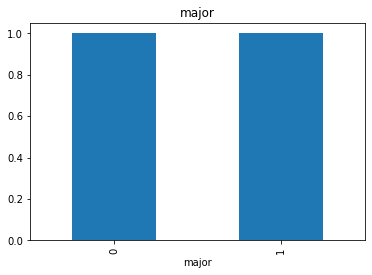

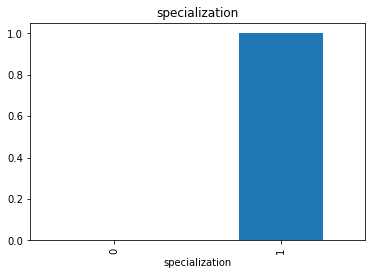

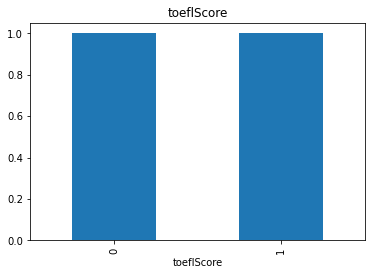

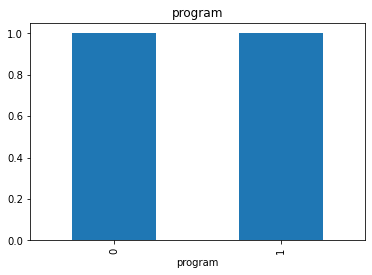

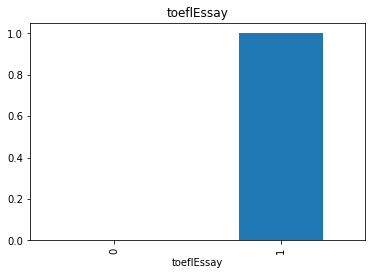

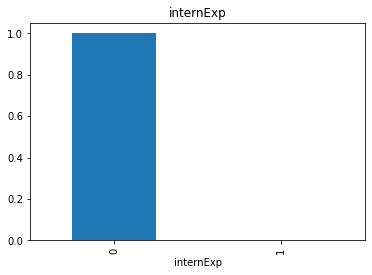

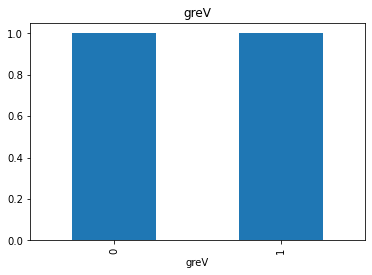

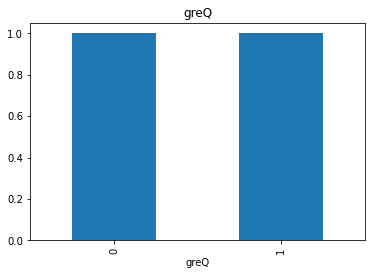

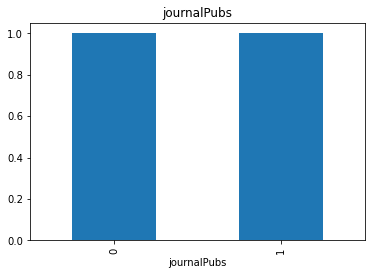

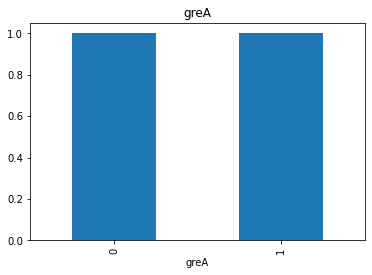

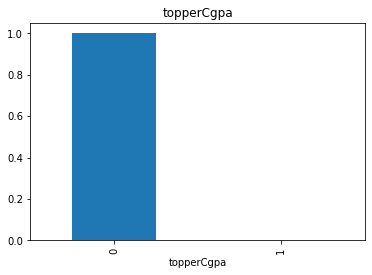

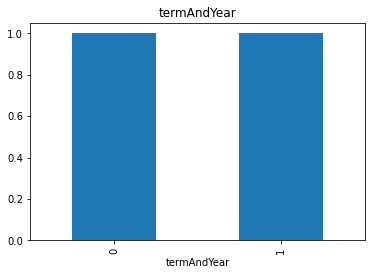

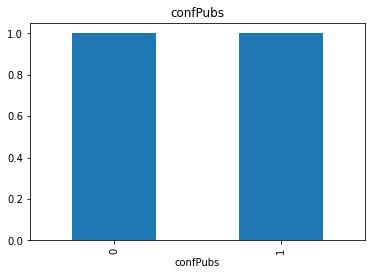

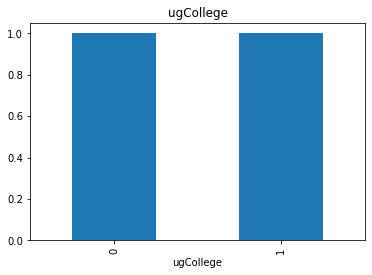

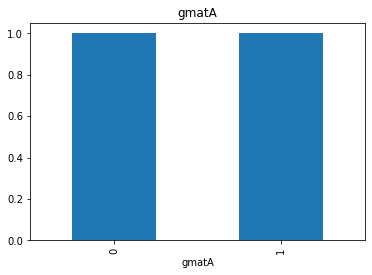

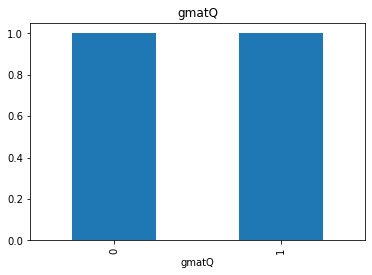

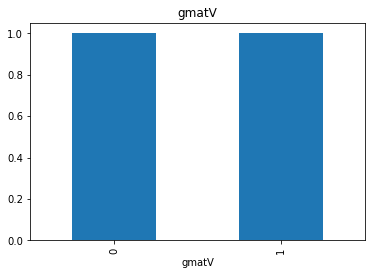

In [17]:

for feature in features_with_na:
    data = dataset.copy()
    
    # make a variable that indicates 1 if the observation was missing or zero otherwise
    data[feature] = np.where(data[feature].isnull(), 1, 0)
    
    data.groupby(feature)['admit'].median().plot.bar()
    plt.title(feature)
    plt.show()

In [18]:
# Drop gmatA, gmatQ, gmatQ, userProfileLink, 

In [19]:
print('num of userName {}'.format(len(dataset['userName'])))

num of userName 53644


In [20]:
# some row (samples) has over 50% of NaN value across the column
# merge program
# convert termAndYear into one numerical feature or one categorial feature(term)and one numerical feature(year)
# reserachExp, industryExp, internExp, each of them is inbalanced

In [21]:
experience = dataset.groupby(['admit'])[['researchExp', 'industryExp', 'internExp']].agg(np.mean).reset_index()
experience.head()

,admit,researchExp,industryExp,internExp
0,0,0.390829,4.683717,0.528699
1,1,0.292398,3.480200,0.385975


In [22]:
experience = dataset.groupby(['admit'])[['researchExp', 'industryExp', 'internExp']]
experience.describe()

researchExp                                               industryExp  \
            count      mean       std  min  25%  50%  75%   max       count   
admit                                                                         
0         25689.0  0.390829  2.765996  0.0  0.0  0.0  0.0  48.0     25689.0   
1         27955.0  0.292398  2.442630  0.0  0.0  0.0  0.0  53.0     27955.0   

                                                      internExp            \
           mean        std  min  25%  50%  75%    max     count      mean   
admit                                                                       
0      4.683717  12.747184  0.0  0.0  0.0  0.0  132.0   25680.0  0.528699   
1      3.480200  11.297067  0.0  0.0  0.0  0.0  138.0   27950.0  0.385975   

                                           
            std  min  25%  50%  75%   max  
admit                                      
0      2.671092  0.0  0.0  0.0  0.0  96.0  
1      2.294361  0.0  0.0  0.0  0.0  96.0

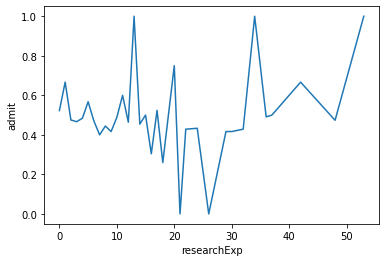

In [23]:
# The following graph is no 100% accurate 
# but can gather some relationship betweem exp and admit
dataset.groupby(['researchExp'])['admit'].mean().plot()
plt.ylabel('admit')
plt.show()

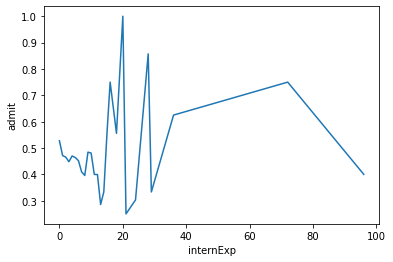

In [24]:
dataset.groupby(['internExp'])['admit'].mean().plot()
plt.ylabel('admit')
plt.show()

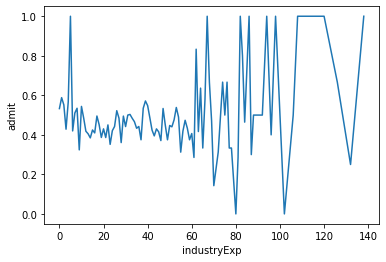

In [25]:
dataset.groupby(['industryExp'])['admit'].mean().plot()
plt.ylabel('admit')
plt.show()

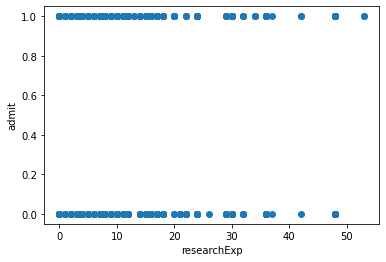

In [26]:
# Accurate scatter plot among reserachExp, industryExp, internExp,
plt.scatter(dataset['researchExp'],dataset['admit'])
plt.xlabel('researchExp')
plt.ylabel('admit')
plt.show()

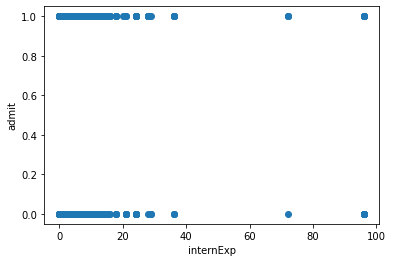

In [27]:
plt.scatter(dataset['internExp'],dataset['admit'])
plt.xlabel('internExp')
plt.ylabel('admit')
plt.show()

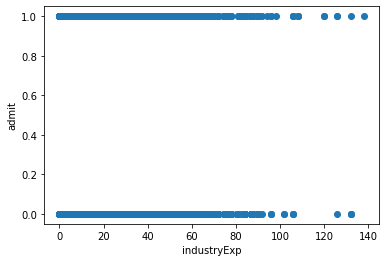

In [28]:
plt.scatter(dataset['industryExp'],dataset['admit'])
plt.xlabel('industryExp')
plt.ylabel('admit')
plt.show()

In [29]:
num_res_zeros = (dataset['researchExp']==0).sum()
num_res_nzeros= (dataset['researchExp']!=0).sum()

print(num_res_zeros, num_res_nzeros)
print(len(dataset['researchExp']))

52101 1543
53644


In [30]:
num_intern_zeros = (dataset['internExp']==0).sum()
num_intern_nzeros= (dataset['internExp']!=0).sum()

print(num_intern_zeros, num_intern_nzeros)
print(len(dataset['internExp']))

49040 4604
53644


In [31]:
num_industry_zeros = (dataset['industryExp']==0).sum()
num_industry_nzeros= (dataset['industryExp']!=0).sum()

print(num_industry_zeros, num_industry_nzeros)
print(len(dataset['industryExp']))

46495 7149
53644


### Numerical Variables

In [32]:
numerical_features = [feature for feature in dataset.columns if dataset[feature].dtypes != 'O']
additional_cols = ['toeflEssay', 'journalPubs', 'confPubs']

for x in additional_cols:
    numerical_features.append(x)
print(numerical_features)
    
print('Number of numerical variables: ', len(numerical_features))
dataset[numerical_features].head(10)

['researchExp', 'industryExp', 'toeflScore', 'internExp', 'greV', 'greQ', 'greA', 'topperCgpa', 'gmatA', 'cgpa', 'gmatQ', 'cgpaScale', 'gmatV', 'admit', 'toeflEssay', 'journalPubs', 'confPubs']
Number of numerical variables:  17


,researchExp,industryExp,toeflScore,internExp,greV,greQ,greA,topperCgpa,gmatA,cgpa,gmatQ,cgpaScale,gmatV,admit,toeflEssay,journalPubs,confPubs
0,0,18,112.0,5.0,160.0,167.0,4.5,8.90,NaN,8.50,NaN,10,NaN,1,26,0,0
1,0,0,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,NaN,0,NaN,1,NaN,0,0
2,0,66,94.0,0.0,146.0,157.0,3.0,81.00,NaN,78.28,NaN,100,NaN,1,21,0,0
3,0,0,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,NaN,0,NaN,1,NaN,NaN,NaN
4,0,0,81.0,0.0,148.0,161.0,2.5,70.00,NaN,57.00,NaN,100,NaN,1,NaN,0,0
5,0,0,273.0,0.0,147.0,1010.0,600.0,75.00,NaN,52.00,NaN,100,NaN,1,6,0,0
6,0,0,104.0,0.0,150.0,161.0,4.5,77.81,NaN,62.20,NaN,100,NaN,1,27,0,0
7,0,0,95.0,0.0,147.0,156.0,3.0,76.00,NaN,52.00,NaN,100,NaN,1,22,0,0
8,0,0,101.0,0.0,152.0,158.0,3.0,74.00,NaN,64.00,NaN,100,NaN,1,24,0,0
9,0,0,107.0,0.0,156.0,163.0,4.5,0.00,NaN,71.40,NaN,100,NaN,1,NaN,0,0


#### Discrete Variables

In [33]:
disceret = dataset[numerical_features].drop(['gmatA','gmatQ', 'gmatV', 'admit'], axis=1)
print (disceret.shape)
disceret.head()

(53644, 13)


,researchExp,industryExp,toeflScore,internExp,greV,greQ,greA,topperCgpa,cgpa,cgpaScale,toeflEssay,journalPubs,confPubs
0,0,18,112.0,5.0,160.0,167.0,4.5,8.9,8.50,10,26,0,0
1,0,0,NaN,0.0,NaN,NaN,NaN,0.0,0.00,0,NaN,0,0
2,0,66,94.0,0.0,146.0,157.0,3.0,81.0,78.28,100,21,0,0
3,0,0,NaN,0.0,NaN,NaN,NaN,0.0,0.00,0,NaN,NaN,NaN
4,0,0,81.0,0.0,148.0,161.0,2.5,70.0,57.00,100,NaN,0,0


In [34]:
disceret.isnull().any()

researchExp    False
industryExp    False
toeflScore      True
internExp       True
greV            True
greQ            True
greA            True
topperCgpa      True
cgpa           False
cgpaScale      False
toeflEssay      True
journalPubs     True
confPubs        True
dtype: bool

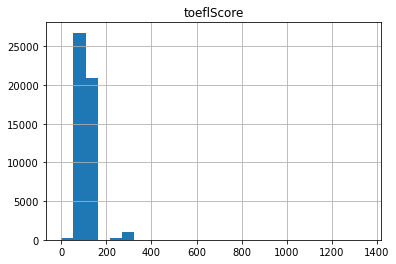

In [35]:
disceret['toeflScore'].hist(bins=25)
plt.title('toeflScore')
plt.show()

In [36]:
# sns.histplot(disceret, x='toeflScore')
# plt.show()

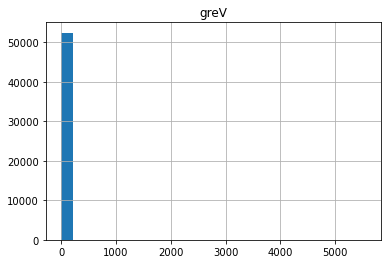

In [37]:
disceret['greV'].hist(bins=25)
plt.title('greV')
plt.show()

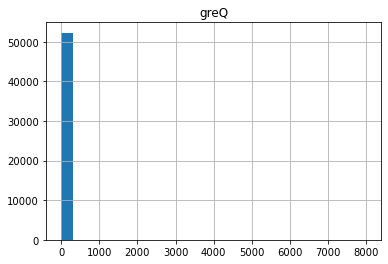

In [38]:
disceret['greQ'].hist(bins=25)
plt.title('greQ')
plt.show()

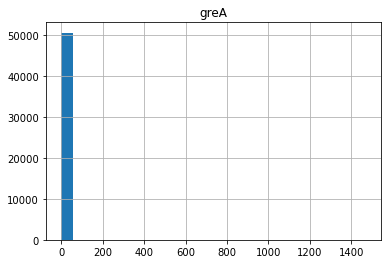

In [39]:
disceret['greA'].hist(bins=25)
plt.title('greA')
plt.show()

In [40]:
disceret.isnull().any()

researchExp    False
industryExp    False
toeflScore      True
internExp       True
greV            True
greQ            True
greA            True
topperCgpa      True
cgpa           False
cgpaScale      False
toeflEssay      True
journalPubs     True
confPubs        True
dtype: bool

In [41]:
fill_mean = ['toeflScore', 'greV', 'greQ','greA','toeflEssay']
# need to conver gpa and greV Q A first

fill_median = ['internExp']
fill_mode = ['journalPubs, confPubs']

In [42]:
#dataset[''].fillna(value=df[''].mean(), inplace=True)